# Analysis of annual burden in basleine Nigeria scenarios

Simplest analysis - looking at burden by year for each of the 4 Nigeria scenarios and plotting

In [1]:
# First load some libraries, including History Matching
%load_ext autoreload
%autoreload 2

import os, glob, re, sys, json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from PythonHelperFunctions.utils import load_dropbox_path
from PythonHelperFunctions.DemographicsHelpers import TranmissionMatrixFromAgeContactMatrix
sns.set(font_scale=2)
sns.set_style("white")

In [78]:
def fix_glob(pth):
    return re.sub('([\[\]])','[\\1]', pth)

### Just get the outputs and look at doubling time and total incidence

In [50]:
TotalTransmissionMatrix = TranmissionMatrixFromAgeContactMatrix(filename = os.path.join(load_dropbox_path(),
                'COVID-19','age_contact_matrices', 'MUestimates_all_locations_2.xlsx'))
SchoolTransmissionMatrix = TranmissionMatrixFromAgeContactMatrix(filename = os.path.join(load_dropbox_path(),
                'COVID-19','age_contact_matrices', 'MUestimates_school_2.xlsx'))
HomeTransmissionMatrix = TranmissionMatrixFromAgeContactMatrix(filename = os.path.join(load_dropbox_path(),
                'COVID-19','age_contact_matrices', 'MUestimates_home_2.xlsx'))
WorkTransmissionMatrix = TranmissionMatrixFromAgeContactMatrix(filename = os.path.join(load_dropbox_path(),
                'COVID-19','age_contact_matrices', 'MUestimates_work_2.xlsx'))
OtherTransmissionMatrix = TranmissionMatrixFromAgeContactMatrix(filename = os.path.join(load_dropbox_path(),
                'COVID-19','age_contact_matrices', 'MUestimates_other_locations_2.xlsx'))
os.mkdir('contactmatrixfigures')

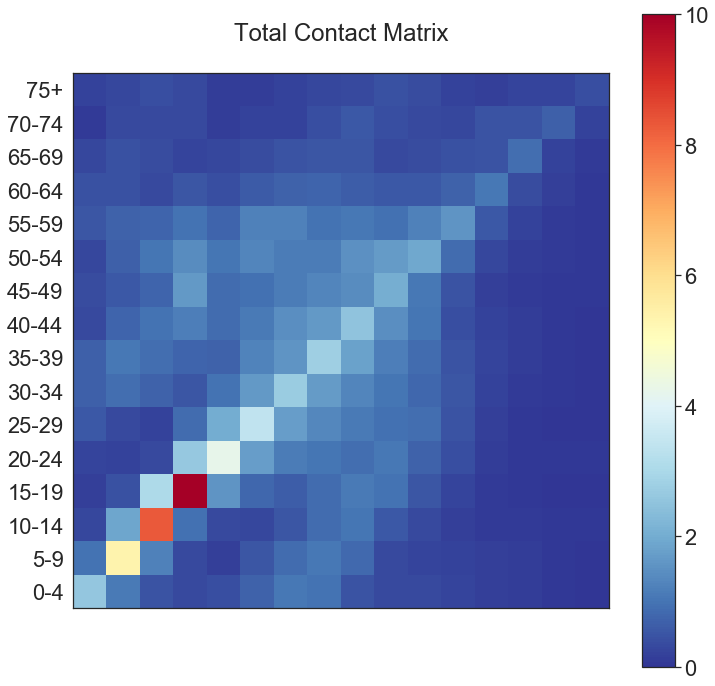

In [52]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(TotalTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Total Contact Matrix')
plt.savefig('contactmatrixfigures/total.png')

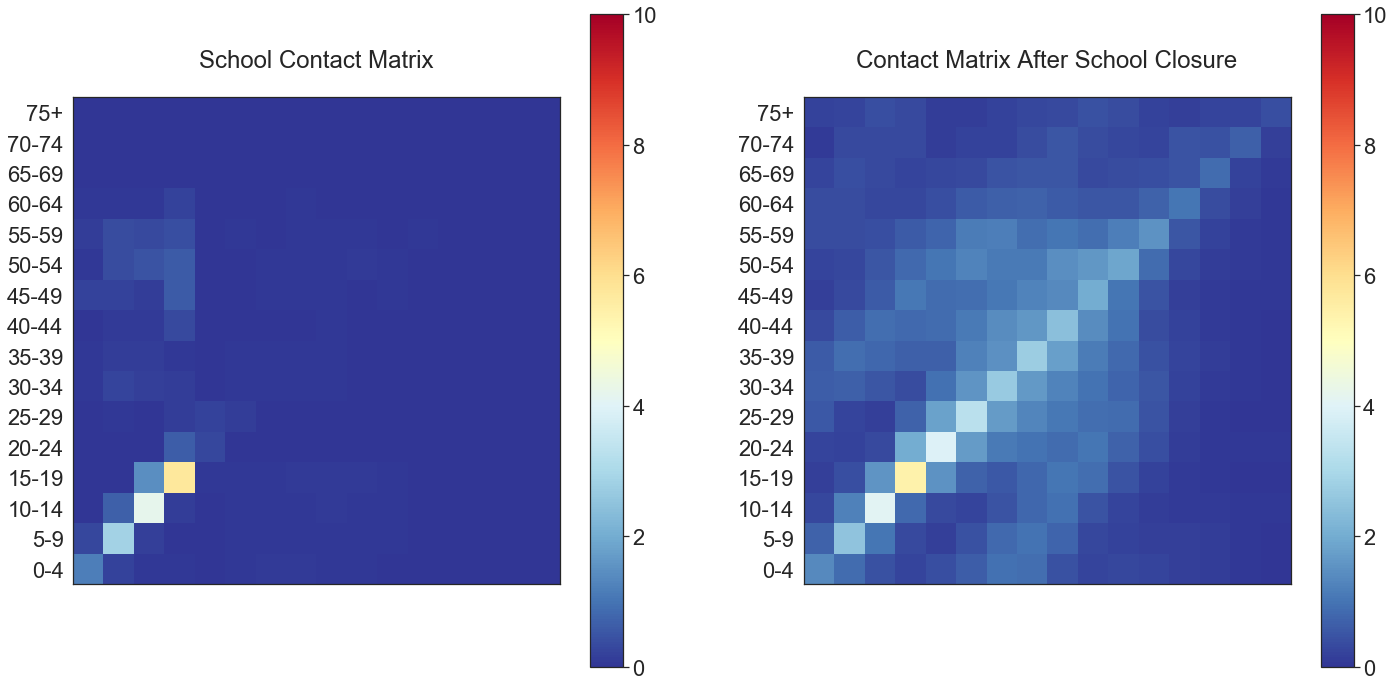

In [55]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(121)
cax = ax.matshow(SchoolTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('School Contact Matrix')
ax = fig.add_subplot(122)
cax = ax.matshow(TotalTransmissionMatrix - SchoolTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Contact Matrix After School Closure')
plt.savefig('contactmatrixfigures/school.png')

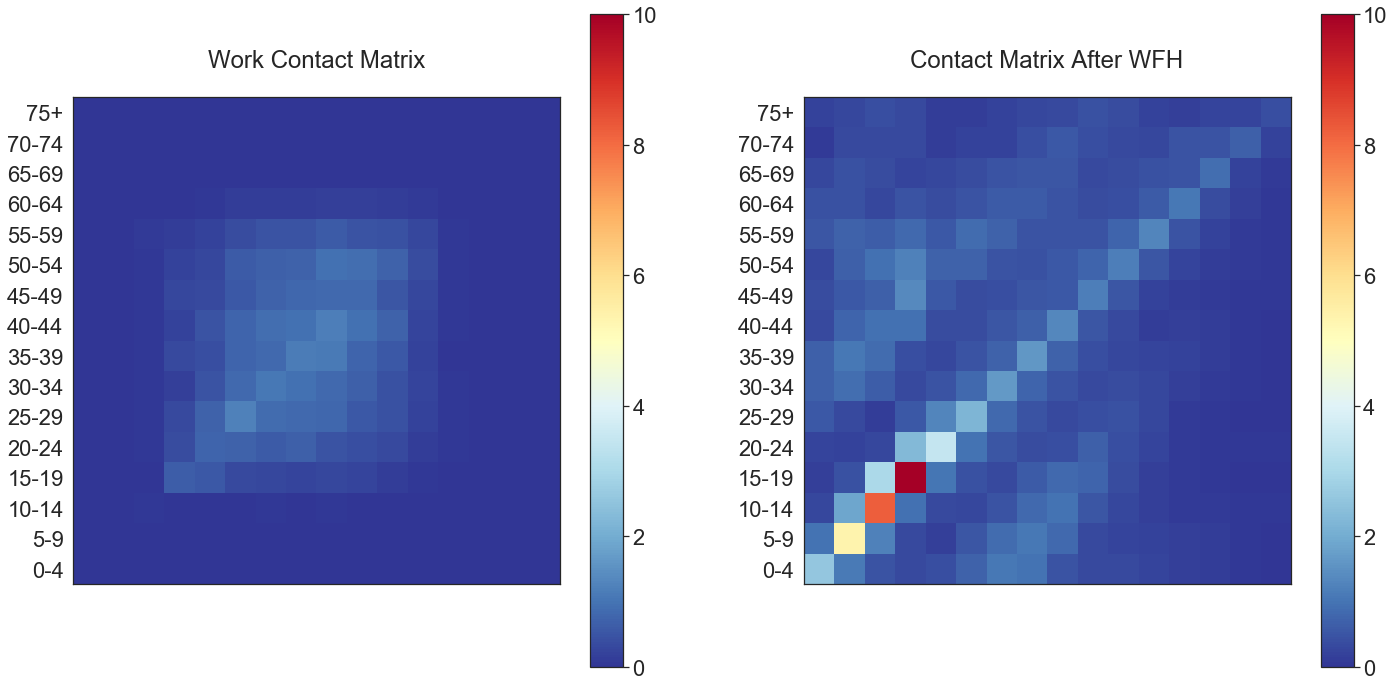

In [53]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(121)
cax = ax.matshow(WorkTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Work Contact Matrix')
ax = fig.add_subplot(122)
cax = ax.matshow(TotalTransmissionMatrix - WorkTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Contact Matrix After WFH')
plt.savefig('contactmatrixfigures/work.png')

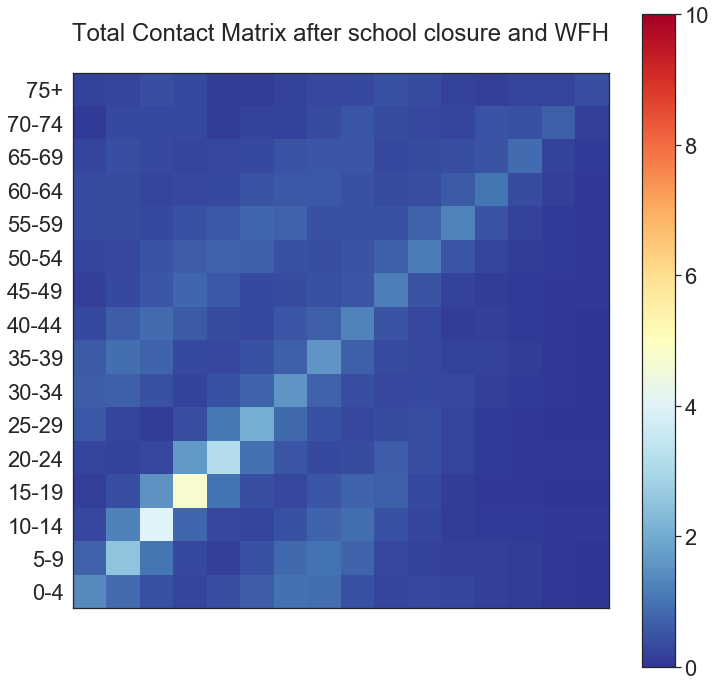

In [54]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(TotalTransmissionMatrix-SchoolTransmissionMatrix-WorkTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Total Contact Matrix after school closure and WFH')
plt.savefig('contactmatrixfigures/schoolplusWFH.png')

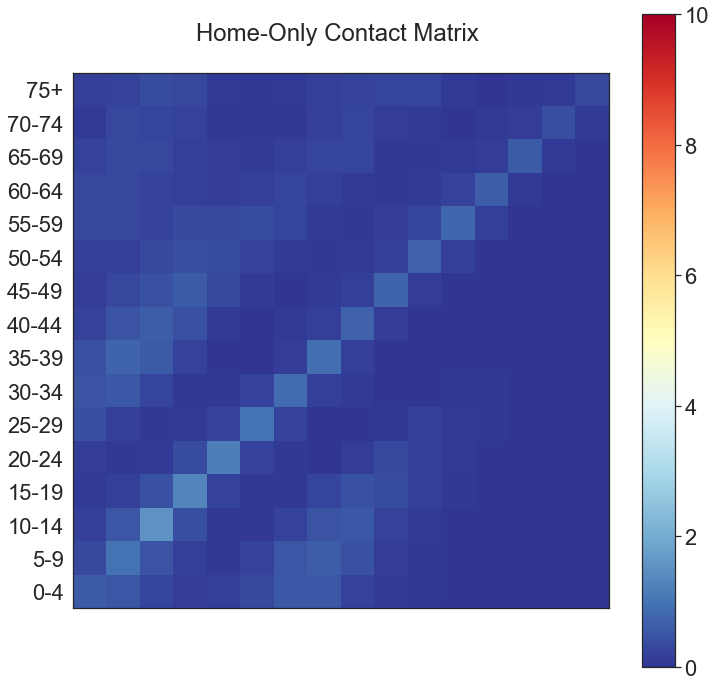

In [56]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(HomeTransmissionMatrix, interpolation='none', origin='lower', vmin=0, vmax=10, cmap='RdYlBu_r')
fig.colorbar(cax)
ax.set_yticks([i for i in range(16)])
ax.set_ylim(-.5, 15.5)
ax.set_yticklabels([str(5*i)+'-'+str(5*i+4)for i in range( 15)]+['75+'])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title('Home-Only Contact Matrix ')
plt.savefig('contactmatrixfigures/home.png')